<a href="https://colab.research.google.com/github/lbiedma/mysfamaf2025/blob/main/codigos/practico4/Ejercicios_3_y_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEFINICIONES GENERALES

In [10]:
import math
import numpy as np
import random
import seaborn as sns
from time import time

In [11]:
#@title discreta $[1,n]$
def udiscreta(n):
  U = random.random()
  return int(n * U) + 1

In [12]:
#@title metodo de simulacion
def simulate(X,n_sim,ddof=0,**kwargs):
    """
    Parameters:
    -----------
    X : callable
        A function (or callable object) that generates a single simulated value when called with **kwargs.
    n_sim : int
        Number of simulations to run.
    ddof : int, optional (default=0)
        Delta degrees of freedom for variance and standard deviation calculations.
        If ddof=0 (default), computes population variance/std.
        If ddof=1, computes sample variance/std (unbiased estimator).
    **kwargs : dict
        Additional keyword arguments passed to the function X.

    Returns:
    --------
    s : ndarray
        Array of all simulated values (shape: (n_sim,)).
    mean_sim : float
        Mean of the simulated values.
    median_sim : float
        Median of the simulated values.
    var_sim : float
        Variance of the simulated values (with specified ddof).
    std_sim : float
        Standard deviation of the simulated values (with specified ddof).
    """
    s = np.empty(n_sim)
    for i in range(n_sim):
      s[i]=X(**kwargs)
    mean_sim = np.mean(s)
    median_sim = np.median(s)
    var_sim = np.var(s,ddof=ddof)
    std_sim = np.std(s,ddof=ddof)
    return s,mean_sim,median_sim,var_sim,std_sim

# Ejercicio 3.
Se lanzan simultáneamente un par de dados legales y se anota
el resultado de la suma de ambos. El proceso se repite hasta que
todos los resultados posibles: $2, 3, \dots, 12$ hayan aparecido al
menos una vez. Estudiar mediante una simulación la variable <mark>$N$, el número de lanzamientos necesarios para cumplir el proceso </mark>. Cada lanzamiento
implica arrojar *el par* de dados.

## a)
Describa la estructura lógica del algoritmo que permite simular en computadora el número de lanzamientos necesarios para cumplir el proceso.

In [13]:
def dices_trial():
  """
  Simulates rolling two fair 6-sided dice and returns their sum.
  """
  return udiscreta(6) + udiscreta(6)

def N():
  """
  Counts how many trials are needed until all sums from 2 to 12 appear at least once.
  """
  s = set()
  i = 0
  while len(s)<11:
    i += 1
    t = dices_trial()
    s.add(t)
  return i

## b)
Mediante una implementación en computadora,

1. Estime el valor medio y la desviación estándar del número de
lanzamientos, repitiendo el algoritmo: 100, 1000, 10000 y 100000
veces.

2. Estime la probabilidad de que  $N$ sea por lo menos 15 y la probabilidad de que $N$ sea a lo sumo 9, repitiendo el algoritmo: 100, 1000, 10000 y 100000.

| n_sim = 100|
|tiempo = 0.00426|
     media = 68.59
desviación = 48.53845794831146
  P(N>=15) = 1.0
   P(N<=9) = 0.0
-----------------------------
| n_sim = 1000|
|tiempo = 0.03591|
     media = 61.355
desviación = 36.79555645726805
  P(N>=15) = 0.998
   P(N<=9) = 0.0
-----------------------------
| n_sim = 10000|
|tiempo = 0.31591|
     media = 60.7878
desviación = 35.71048545119486
  P(N>=15) = 0.9985
   P(N<=9) = 0.0
-----------------------------
| n_sim = 100000|
|tiempo = 3.25588|
     media = 61.30005
desviación = 36.21586503174403
  P(N>=15) = 0.99853
   P(N<=9) = 0.0
-----------------------------


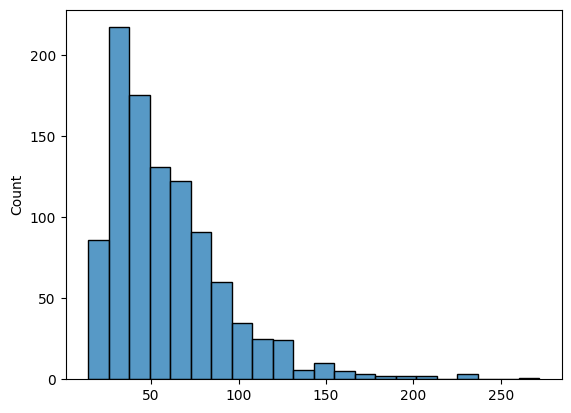

In [15]:
#@title { vertical-output: true}
for k in [int(x) for x in [1e2,1e3,1e4,1e5]]:
  initial_t = time()
  s,mean,_,_,std = simulate(N,
                            n_sim=k)
  print(f'| n_sim = {k}|')
  print(f'|tiempo = {round(time()-initial_t,5)}|')
  p_15 = np.sum(s >= 15)/k
  p_9 = np.sum(s <= 9)/k
  print(f'     media = {mean}')
  print(f'desviación = {std}')
  print(f'  P(N>=15) = {p_15}')
  print(f'   P(N<=9) = {p_9}')
  print('-----------------------------')
s,mean,_,_,std = simulate(N, n_sim=int(1e3))
binwidth = 12
sns.histplot(s,
             binwidth=binwidth,
             );

# Ejercicio 11.

Sea $X$ una variable aleatoria cuya distribución de
probabilidad es $P(X=j) = p_j$ con $j=1,2,\dots$. Sea:

$$
\lambda_n = P(X=n | X>n-1) = \frac{p_n}
{1 - \displaystyle \sum_{j=1}^{n-1} p_j}
\;,\;\; n=1,2,\dots
$$

Las cantidades $\lambda_n$, son las <mark>tasas discretas de riesgo</mark>.
Considerando a $X$ como el tiempo (discreto) de vida de alg\'un
art\'iculo, $\lambda_n$ representa la probabilidad de que habiendo
funcionado correctamente hasta el tiempo $n-1$, se rompa en el tiempo $n$.

## a)
Muestre que $p_1 = \lambda_1$ y que

$$
p_n = (1-\lambda_1) (1-\lambda_2) \cdots (1-\lambda_{n-1}) \lambda_n
$$

$$\lambda_1=P(X=1|X>0)=\frac{P(X=1,X>0)}{P(X>0)}=\frac{P(X=1)}{1}=p_1$$

\begin{align*}
\lambda_2 &=\frac{p_2}{1-p_1}\\
\lambda_2(1-p_1) &= p_2\\
\lambda_2(1-\lambda_1) &=p_2
\end{align*}




Sean
$$s(k)=\sum_{j=1}^kp_j$$ y

$$m(k)=\prod_{j=1}^k(1-\lambda_j)$$

Vamos a probar por HI... osea queremos ver $p_{k+1}= \lambda_{k+1}m(k)$ suponiendo que vale para $k$. Ahora tenemos por definicion:

\begin{align*}
\\
\lambda_k &= \frac{p_k}{1-s(k-1)}\\
1-s(k-1) &= \frac{p_k}{\lambda_k} \\
1-\frac{p_k}{\lambda_k} &=s(k-1)  \\\\
&\text{(Por HI)}\\
1-m(k-1) &=s(k-1) \quad (🐬)
\end{align*}



Por lo tanto:

\begin{align*}
\\
p_{k+1} &= \lambda_{k+1}(1-s(k)) \\
&= \lambda_{k+1}(1-(s(k-1)+p_k)) \\\\
&\text{Por }(🐬)\\
&= \lambda_{k+1}(1-(1-m(k-1)+p_k)) \\
&= \lambda_{k+1}(m(k-1)-p_k)\\\\
&\text{(Por HI)}\\
&= \lambda_{k+1}(m(k-1)-m(k-1)\lambda_k)\\
&= \lambda_{k+1}m(k-1)(1-\lambda_k)\\
&= \lambda_{k+1}m(k)  
\end{align*}


## <mark>***Método de la tasa discreta de riesgo***</mark>

Para simular
variables aleatorias discretas: Se genera una sucesión de
números aleatorios que <mark>termina cuando el n-ésimo número
generado es menor que $\lambda_n$</mark>.
El algoritmo puede escribirse como sigue:

> `Paso 1: X = 1`

> `Paso 2: Generar U`

> `Paso 3: Si U <` $\lambda_X$`, terminar.`

> `Paso 4: X = X + 1`

> `Paso 5: Ir al Paso 2`

In [ ]:
#@title algoritmo de tasa de riesgo
def x_tasa_discreta(p,**kwargs):
    """
    Metodo de la tasa discreta
    """

    k = 1
    sum = 1
    l = 1
    while True:
        u = random.random()
        if k == 1:
            pass
        else:
          sum -= p(x=k-1,**kwargs)
          # sum -= l*sum
        l = p(x=k,**kwargs)/sum
        if u < l:
            return k
        k += 1

## b)
Muestre que los valores de $X$ que genera este
proceso tienen la distribución de probabilidad deseada.

Supongamos que $X$ genera el valor $n$, es decir, sucedio que para cada $i< n$ se genero un valor $u_i$ aleatorio en $\,\mathcal U[0,1]$ que cumplieron $u_i\geq\lambda_i$, pero el $n$-esimo generado cumplió $u_n<\lambda_n$ osea:


\begin{align*}
P(X \text{ generar } n)&=\\
P(u_1\geq\lambda_1,\cdots,u_{n-1}\geq\lambda_{n-1},u_n<\lambda_n)&=\prod_{i=1}^{n-1}P(u_i>\lambda_i)\cdot P(u_n<\lambda_n)\\
&=\prod_{i=1}^{n-1}(1-\lambda_i)\cdot \lambda_n\\
&=p_n
\end{align*}

## c)
Suponga que $X$ es una variable aleatoria
geométrica con parámetro $p$:

$$
P(X=n) = p (1-p)^{n-1} \;,\;\; n \geq 1.
$$

Determine los valores de $\lambda_n, n \geq 1$. Explique cómo
funciona el algoritmo anterior en este caso y por qué es evidente
su validez.

La acumulada es $P(X\leq n)=1-(1-p)^n$, por lo tanto
\begin{align*}
\\
P(X> n-1)=1-P(X\leq n-1)=1-(1-(1-p)^{n-1})=(1-p)^{n-1}
\end{align*}
 entonces:

$$\lambda_n=\frac{p(1-p)^{n-1}}{(1-p)^{n-1}}=p$$

In [ ]:
def geom_tasa_discreta(pr):
    """
    Metodo de la tasa discreta para una variable geometrica
    """

    k = 1
    while True:
        u = random.random()
        if u < pr:
            return k
        k += 1

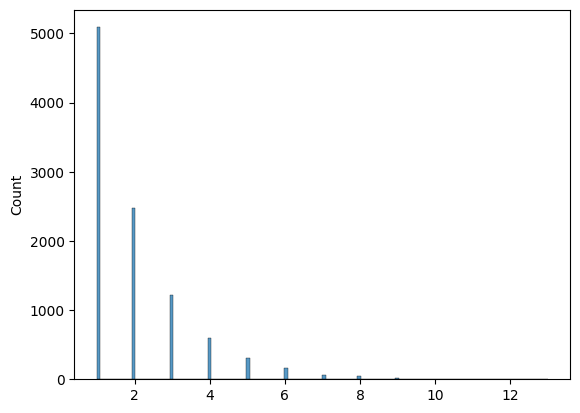

In [ ]:
#@title { vertical-output: true}
n_sim = int(1e4)
s = simulate(geom_tasa_discreta,
             n_sim,
             pr=0.5);
sns.histplot(s[0]);